In [ ]:
from PIL import Image
import os
from google.colab import drive
import numpy as np
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Mount Google Drive
drive.mount('/content/drive')

# Define the path where Google Drive is mounted in Colab
google_drive_path = '/content/drive/My Drive/'

# Define the path to your dataset within Google Drive
main_folder_path = os.path.join(google_drive_path, 'Brain Tumour Detection')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


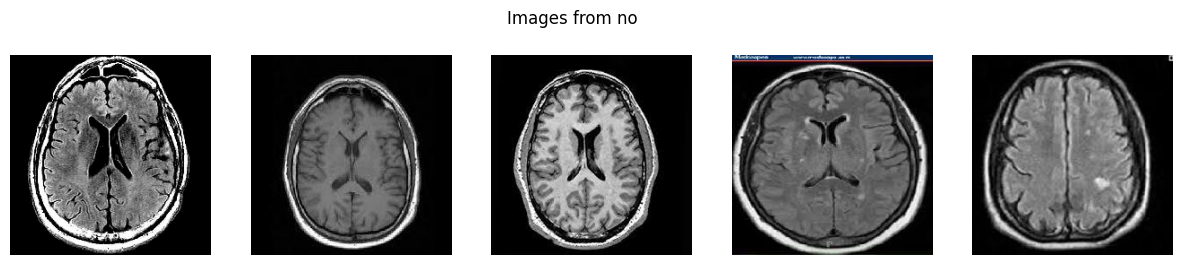

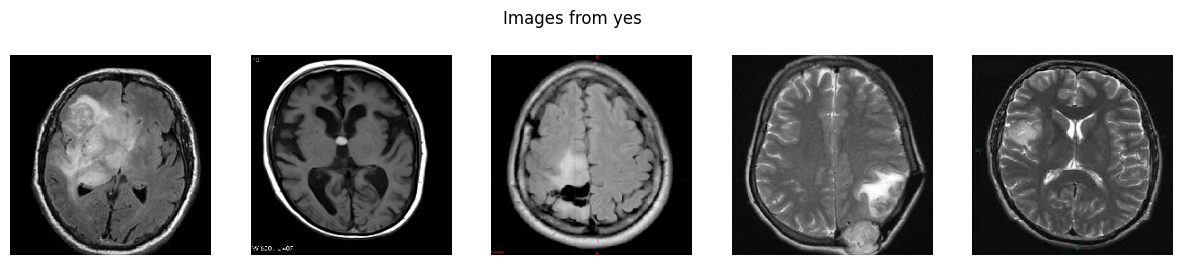

In [ ]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define the path to your dataset within Google Drive
#main_folder_path = '/content/drive/My Drive/resized_path'

# Function to display 5 images from each subfolder
def display_images_from_subfolders(main_folder_path, num_images=5):
    subfolders = [f.path for f in os.scandir(main_folder_path) if f.is_dir()]

    for subfolder in subfolders:
        images = [f.path for f in os.scandir(subfolder) if f.is_file() and f.name.endswith(('.jpg', '.jpeg', '.png'))]
        images = images[:num_images]

        plt.figure(figsize=(15, 3))

        for i, img_path in enumerate(images, start=1):
            img = image.load_img(img_path, target_size=(224, 224))
            plt.subplot(1, num_images, i)
            plt.imshow(img)
            plt.axis('off')

        plt.suptitle(f"Images from {os.path.basename(subfolder)}")
        plt.show()

# Display 5 images from each subfolder
display_images_from_subfolders(main_folder_path, num_images=5)


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# ...

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# ...


In [ ]:
# Load pre-trained VGG16 model
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model for fine-tuning
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(2, activation='softmax'))  # 12 classes, change if needed

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with updated learning_rate
model.compile(optimizer=Adam(learning_rate=0.001),  # Update 'lr' to 'learning_rate'
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define data generators for training
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

# Adjust the 'classes' parameter based on your subfolder names
train_generator = datagen.flow_from_directory(main_folder_path,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')

val_generator = datagen.flow_from_directory(main_folder_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            subset='validation')

# Train the model
history = model.fit(train_generator,
                    epochs=10,  # Adjust as needed
                    validation_data=val_generator)

# Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {val_acc * 100:.2f}%")

Found 2402 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Epoch 1/10
76/76 [==============================] - 18s 222ms/step - loss: 1.0899 - accuracy: 0.7048 - val_loss: 0.5907 - val_accuracy: 0.8083
Epoch 2/10
76/76 [==============================] - 17s 217ms/step - loss: 0.4642 - accuracy: 0.8401 - val_loss: 0.4166 - val_accuracy: 0.8550
Epoch 3/10
76/76 [==============================] - 17s 223ms/step - loss: 0.3045 - accuracy: 0.8868 - val_loss: 0.2519 - val_accuracy: 0.9050
Epoch 4/10
76/76 [==============================] - 17s 220ms/step - loss: 0.2257 - accuracy: 0.9142 - val_loss: 0.1775 - val_accuracy: 0.9300
Epoch 5/10
76/76 [==============================] - 18s 231ms/step - loss: 0.1784 - accuracy: 0.9288 - val_loss: 0.1423 - val_accuracy: 0.9483
Epoch 6/10
76/76 [==============================] - 17s 219ms/step - loss: 0.1504 - accuracy: 0.9413 - val_loss: 0.1355 - val_accuracy: 0.9400
Epoch 7/10
76/76 [==============================] - 18s 232

In [ ]:
# Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print(f"\nValidation Accuracy: {val_acc * 100:.2f}%")

19/19 [==============================] - 4s 195ms/step - loss: 0.0960 - accuracy: 0.9667

Validation Accuracy: 96.67%


1/1 [==============================] - 0s 19ms/step
Shape of prediction array: (1, 2)


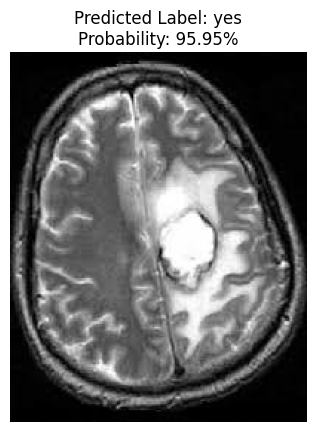

In [ ]:
def predict_and_display(image_path):
    # Load the image
    image_np = cv2.imread(image_path)

    # Preprocess the image for prediction
    img_array = cv2.resize(image_np, (224, 224))
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make prediction
    prediction = model.predict(img_array)

    # Print the shape of the prediction array
    print("Shape of prediction array:", prediction.shape)

    # Get class labels from the generator
    class_labels = list(train_generator.class_indices.keys())

    # Decode predictions for your custom set of classes
    decoded_predictions = [(class_labels[i], prediction[0][i]) for i in range(len(class_labels))]
    decoded_predictions.sort(key=lambda x: x[1], reverse=True)

    # Extract predicted label and probability for the top class
    predicted_label, probability = decoded_predictions[0]

    # Display the image without segmentation
    plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Predicted Label: {predicted_label}\nProbability: {probability:.2%}")
    plt.show()

# Test the function with an example image
test_image_path = 'pred2.jpg'  # Update with your test image path
predict_and_display(test_image_path)


1/1 [==============================] - 0s 20ms/step
Shape of prediction array: (1, 2)


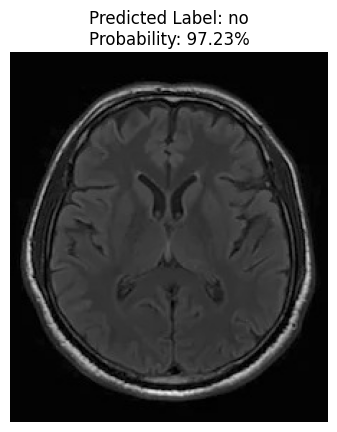

In [ ]:
def predict_and_display(image_path):
    # Load the image
    image_np = cv2.imread(image_path)

    # Preprocess the image for prediction
    img_array = cv2.resize(image_np, (224, 224))
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make prediction
    prediction = model.predict(img_array)

    # Print the shape of the prediction array
    print("Shape of prediction array:", prediction.shape)

    # Get class labels from the generator
    class_labels = list(train_generator.class_indices.keys())

    # Decode predictions for your custom set of classes
    decoded_predictions = [(class_labels[i], prediction[0][i]) for i in range(len(class_labels))]
    decoded_predictions.sort(key=lambda x: x[1], reverse=True)

    # Extract predicted label and probability for the top class
    predicted_label, probability = decoded_predictions[0]

    # Display the image without segmentation
    plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Predicted Label: {predicted_label}\nProbability: {probability:.2%}")
    plt.show()

# Test the function with an example image
test_image_path = 'pred3.jpg'  # Update with your test image path
predict_and_display(test_image_path)
